In [1]:

import yaml
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import transformations
import db_utils
from scipy import stats
import numpy as np



In [2]:
rds = db_utils.RDSDatabaseConnector()
df = rds.extract_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [4]:
nulls = pd.DataFrame(df.isnull().sum()).reset_index()
nulls.columns = ['column', 'null_count']
nulls['percentage'] = (nulls['null_count'] / 54321) * 100.0

In [5]:
nulls

,column,null_count,percentage
0,id,0,0.000000
1,member_id,0,0.000000
2,loan_amount,0,0.000000
3,funded_amount,3007,5.535612
4,funded_amount_inv,0,0.000000
5,term,4772,8.784816
6,int_rate,5169,9.515657
7,instalment,0,0.000000
8,grade,0,0.000000
9,sub_grade,0,0.000000


In [6]:
transformations.Transforms.explore_nulls(df)

,column,null_count,percentage
0,id,0,0.000000
1,member_id,0,0.000000
2,loan_amount,0,0.000000
3,funded_amount,3007,5.535612
4,funded_amount_inv,0,0.000000
5,term,4772,8.784816
6,int_rate,5169,9.515657
7,instalment,0,0.000000
8,grade,0,0.000000
9,sub_grade,0,0.000000


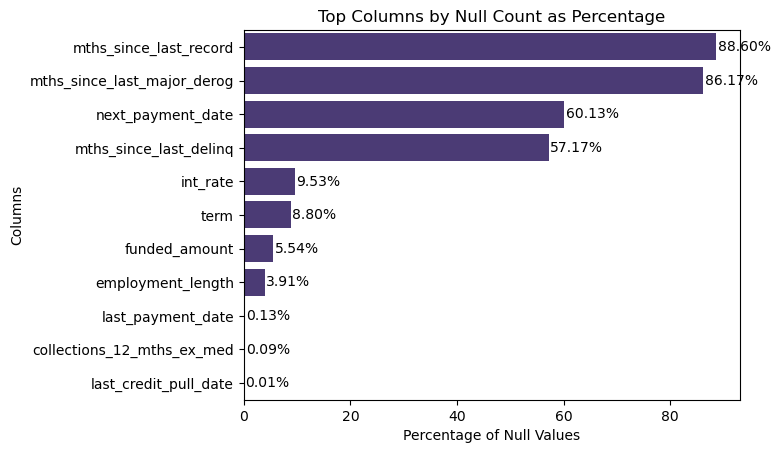

In [7]:
transformations.Plotter.percentage_nulls_by_feature(nulls)

In [8]:
# dropping columns with more than 50% nulls 
df = transformations.Transforms.drop_cols_with_morethanhalf_nulls(df)


In [9]:
#correcting datatypes
datecols = [col for col in df.columns if 'date' in col]

transformations.Transforms.cols_to_datetime(datecols,df)

In [10]:
df[datecols].dtypes


issue_date               datetime64[ns]
last_payment_date        datetime64[ns]
last_credit_pull_date    datetime64[ns]
dtype: object

In [11]:
df['term'].isnull().sum()

4772

In [12]:
transformations.Transforms.term_string_to_digit(['term'],df)

In [13]:
df.term

0        36.0
1        36.0
2        36.0
3        36.0
4        36.0
         ... 
54226    36.0
54227    36.0
54228    36.0
54229    36.0
54230    36.0
Name: term, Length: 54231, dtype: float64

In [14]:
transformations.Transforms.numeric_null_fill_with_median(df)

In [15]:
transformations.Transforms.explore_nulls(df)

,column,null_count,percentage
0,id,0,0.000000
1,member_id,0,0.000000
2,loan_amount,0,0.000000
3,funded_amount,0,0.000000
4,funded_amount_inv,0,0.000000
5,term,0,0.000000
6,int_rate,0,0.000000
7,instalment,0,0.000000
8,grade,0,0.000000
9,sub_grade,0,0.000000


In [16]:
# most of the nulls are dealt with: just last_credit... and last_payment_date : leave for now.

In [17]:
categoric_cols = df.select_dtypes(include=object).columns.to_list()
# of these: term  should be numeric, earliest credit_line date and the remaining are categories

In [18]:
df.rename(columns={'term': 'term_months', 'employment_length':'employment_length_years'}, inplace=True)


In [19]:
transformations.Transforms.cols_to_datetime(['earliest_credit_line'], df)

In [20]:
transformations.Transforms.term_string_to_digit(['employment_length_years'], df)

In [21]:
#Remaining categories:

df.select_dtypes(include=object).columns

categoric_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'payment_plan', 'purpose', 'application_type']

transformations.Transforms.cols_to_category(categoric_columns, df)


In [22]:
df.employment_length_years


0         5.0
1         9.0
2         8.0
3         1.0
4        10.0
         ... 
54226     1.0
54227     1.0
54228    10.0
54229     4.0
54230     9.0
Name: employment_length_years, Length: 54231, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term_months                 54231 non-null  float64       
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length_years     52113 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [24]:
transformations.Transforms.numeric_null_fill_with_median(df)

In [25]:
transformations.Transforms.explore_nulls(df)

,column,null_count,percentage
0,id,0,0.000000
1,member_id,0,0.000000
2,loan_amount,0,0.000000
3,funded_amount,0,0.000000
4,funded_amount_inv,0,0.000000
5,term_months,0,0.000000
6,int_rate,0,0.000000
7,instalment,0,0.000000
8,grade,0,0.000000
9,sub_grade,0,0.000000


In [26]:
df['id'] = df['id'].astype('str')
df['member_id'] = df['member_id'].astype('str')
df['policy_code'] = df['policy_code'].astype('str')

In [27]:
transformations.Transforms.categoric_null_fill_with_mode(df)


In [28]:
df.to_csv('cleaned_df.csv')
# for comparison, checking

## Now explore skewness of numeric columns


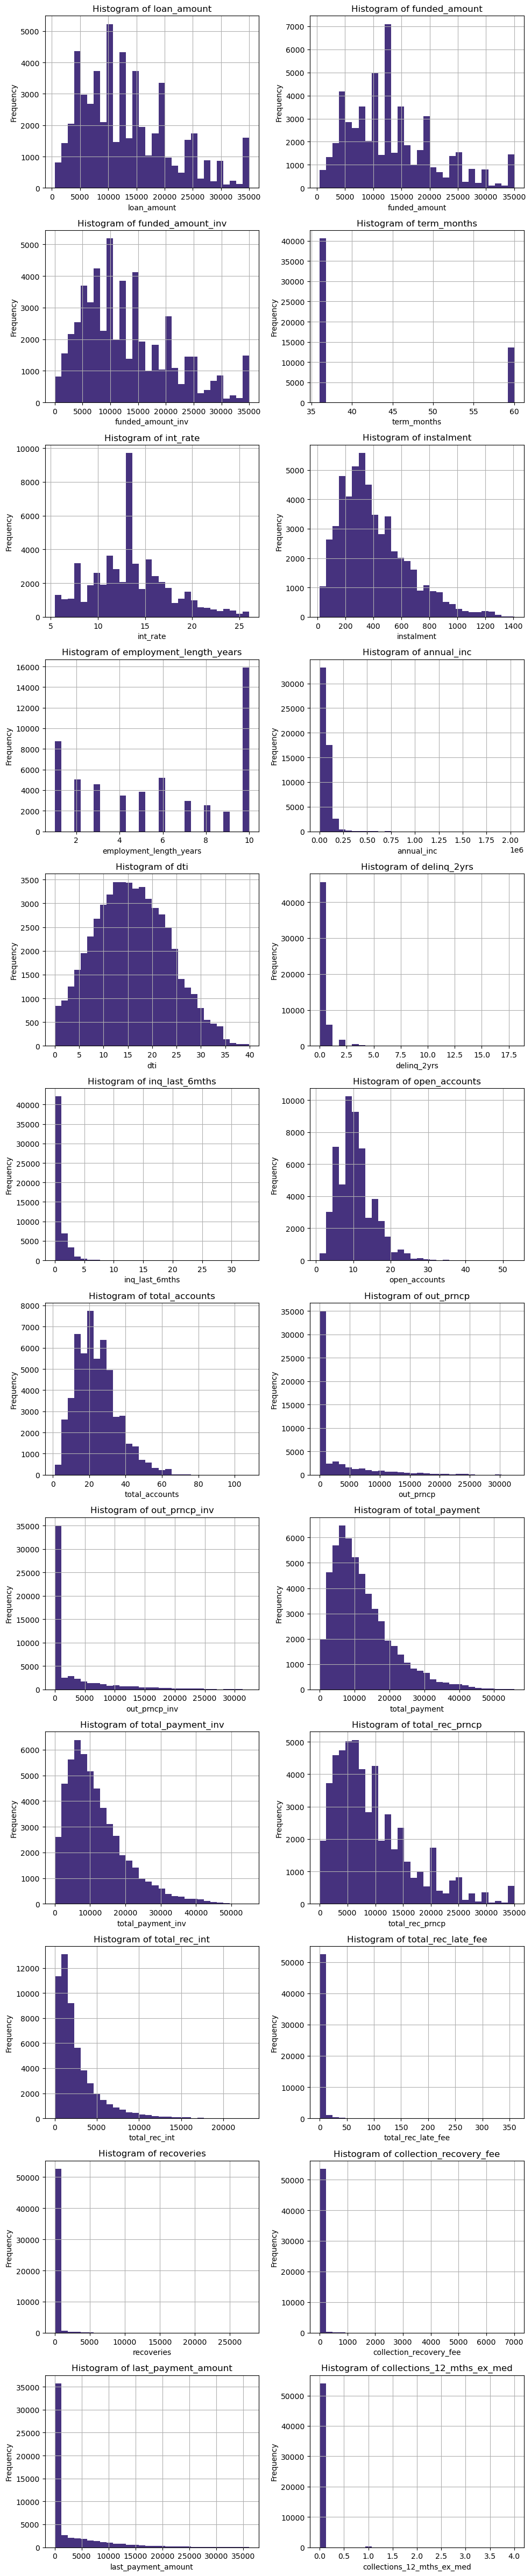

In [29]:
p = transformations.Plotter(df)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.to_list()
p.plot_skewness(numeric_columns)

# before correcting skewed columns

In [30]:

numeric_columns = df.select_dtypes(include=[np.number]).columns.to_list()

In [31]:
numeric_columns


['loan_amount',
 'funded_amount',
 'funded_amount_inv',
 'term_months',
 'int_rate',
 'instalment',
 'employment_length_years',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_accounts',
 'total_accounts',
 'out_prncp',
 'out_prncp_inv',
 'total_payment',
 'total_payment_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_payment_amount',
 'collections_12_mths_ex_med']

In [32]:
skewness_df = pd.DataFrame({'Column': numeric_columns, 'Skewness': [df[col].skew() for col in numeric_columns]})

In [33]:
skewness_df.sort_values(by='Skewness', ascending=False)

,Column,Skewness
21,collection_recovery_fee,27.636843
23,collections_12_mths_ex_med,20.262376
20,recoveries,14.589793
19,total_rec_late_fee,13.184305
7,annual_inc,8.711831
9,delinq_2yrs,5.370002
10,inq_last_6mths,3.248918
22,last_payment_amount,2.499381
14,out_prncp_inv,2.356848
13,out_prncp,2.356426


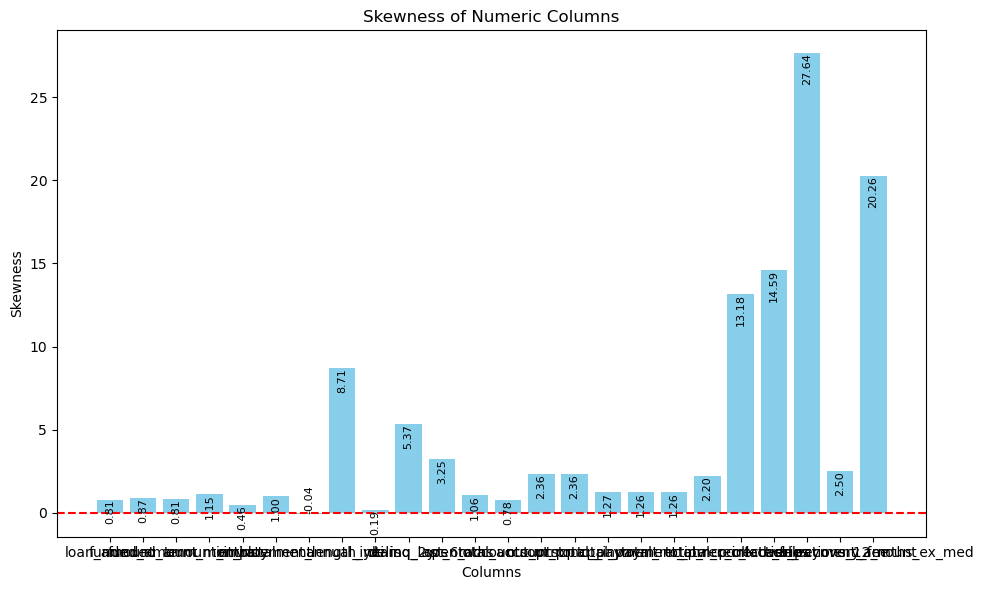

In [34]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(skewness_df['Column'], skewness_df['Skewness'], color='skyblue')  # Plot bars
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Numeric Columns')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero for reference

# Adding text labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.2f}',  # Format the label to two decimal places
             ha='center',  # Horizontal alignment
             va='bottom' if yval < 0 else 'top',  # Vertical alignment based on the sign of yval
             rotation=90,  # Set rotation to vertical
             color='black',
             fontsize=8)  # Set font size

plt.tight_layout()  # Adjust layout to fit everything
plt.show()  # Display the plot

In [35]:
high_skew_cols = skewness_df[skewness_df['Skewness']**2>=4]# absolute value of skewness greater of equal to 2, for which we transform



In [36]:
high_skew_cols = high_skew_cols['Column'].to_list()

In [37]:
high_skew_cols

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_payment_amount',
 'collections_12_mths_ex_med']

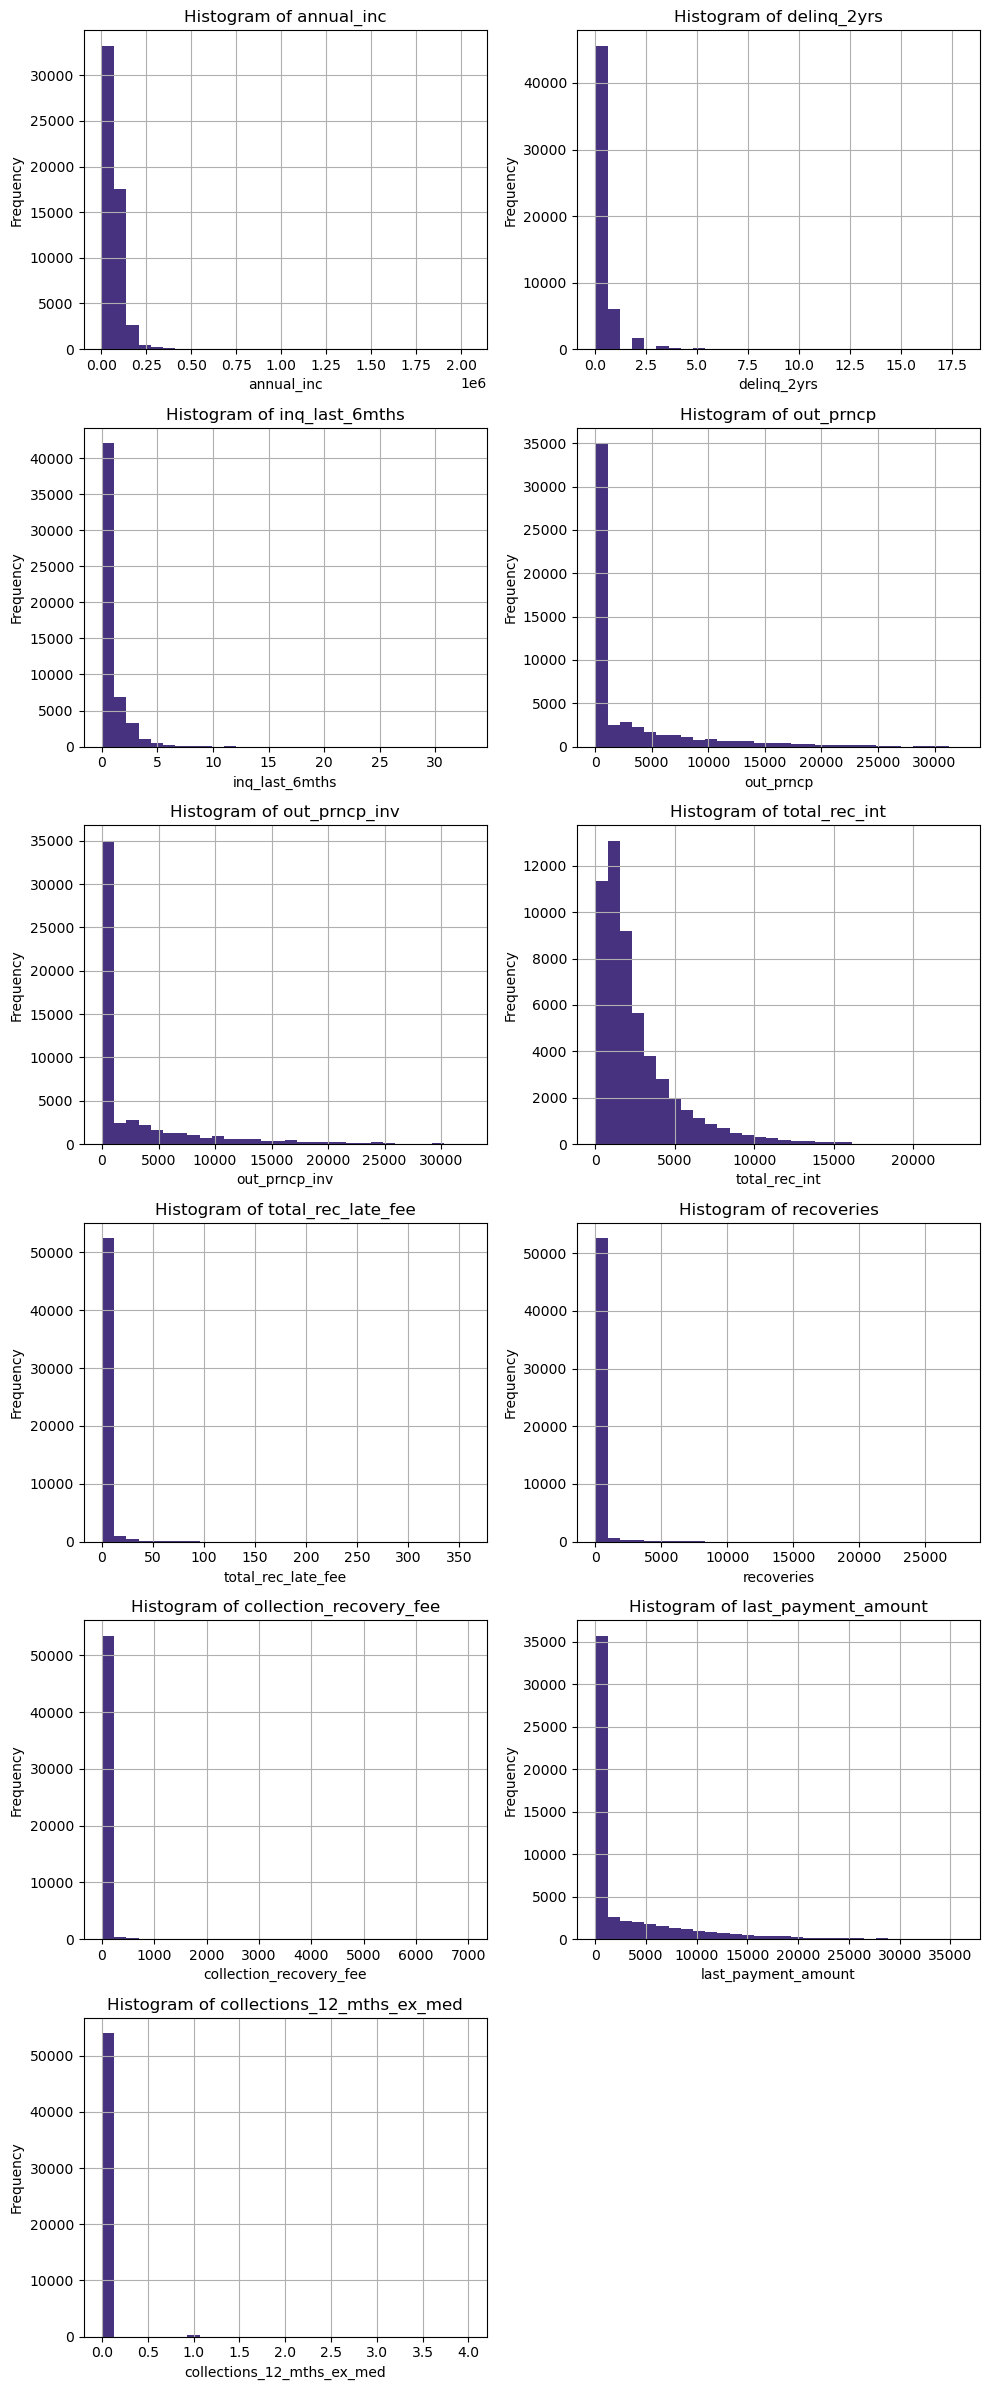

In [38]:
p2 = transformations.Plotter(df)

p2.plot_skewness(high_skew_cols)

#before transformation

In [39]:
columns = high_skew_cols

# Apply Yeo-Johnson transformation to each column
yj_transformed_data = pd.DataFrame()
lambdas= {}
for column in columns:
    yj_transformed_data[column], lambdas[column]= stats.yeojohnson(df[column])

In [40]:
lambdas

{'annual_inc': -0.05955512865169244,
 'delinq_2yrs': -7.064260187800777,
 'inq_last_6mths': -0.8678906698937547,
 'out_prncp': -0.18817807686971857,
 'out_prncp_inv': -0.1882023581332233,
 'total_rec_int': 0.1917601175663721,
 'total_rec_late_fee': -9.626114680158258,
 'recoveries': -2.351263898915706,
 'collection_recovery_fee': -4.786278223260177,
 'last_payment_amount': -0.02261767466878012,
 'collections_12_mths_ex_med': -356.4224764578045}

In [41]:
skewness_df

,Column,Skewness
0,loan_amount,0.805259
1,funded_amount,0.869922
2,funded_amount_inv,0.813927
3,term_months,1.148358
4,int_rate,0.456515
5,instalment,0.996981
6,employment_length_years,-0.038738
7,annual_inc,8.711831
8,dti,0.189420
9,delinq_2yrs,5.370002


In [42]:
yj_transformed_data

,annual_inc,delinq_2yrs,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med
0,7.932075,0.141497,0.520864,4.264278,4.263948,12.042267,-0.000000,-0.000000,-0.000000,5.189973,-0.0
1,7.975957,-0.000000,-0.000000,4.358261,4.357910,13.525566,-0.000000,-0.000000,-0.000000,5.621638,-0.0
2,8.178785,-0.000000,-0.000000,-0.000000,-0.000000,13.689240,-0.000000,-0.000000,-0.000000,8.517393,-0.0
3,7.883949,-0.000000,-0.000000,-0.000000,-0.000000,14.199200,-0.000000,-0.000000,-0.000000,8.580717,-0.0
4,8.517561,-0.000000,0.520864,4.380184,4.379828,13.447401,-0.000000,-0.000000,-0.000000,5.720426,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
54226,8.781659,0.141497,-0.000000,-0.000000,-0.000000,13.228280,-0.000000,-0.000000,-0.000000,4.803646,-0.0
54227,7.320697,-0.000000,0.806269,-0.000000,-0.000000,13.697006,0.103884,-0.000000,-0.000000,5.781842,-0.0
54228,8.868157,-0.000000,-0.000000,-0.000000,-0.000000,11.363963,-0.000000,-0.000000,-0.000000,4.472062,-0.0
54229,8.674508,-0.000000,-0.000000,-0.000000,-0.000000,8.827914,-0.000000,-0.000000,-0.000000,-0.000000,-0.0


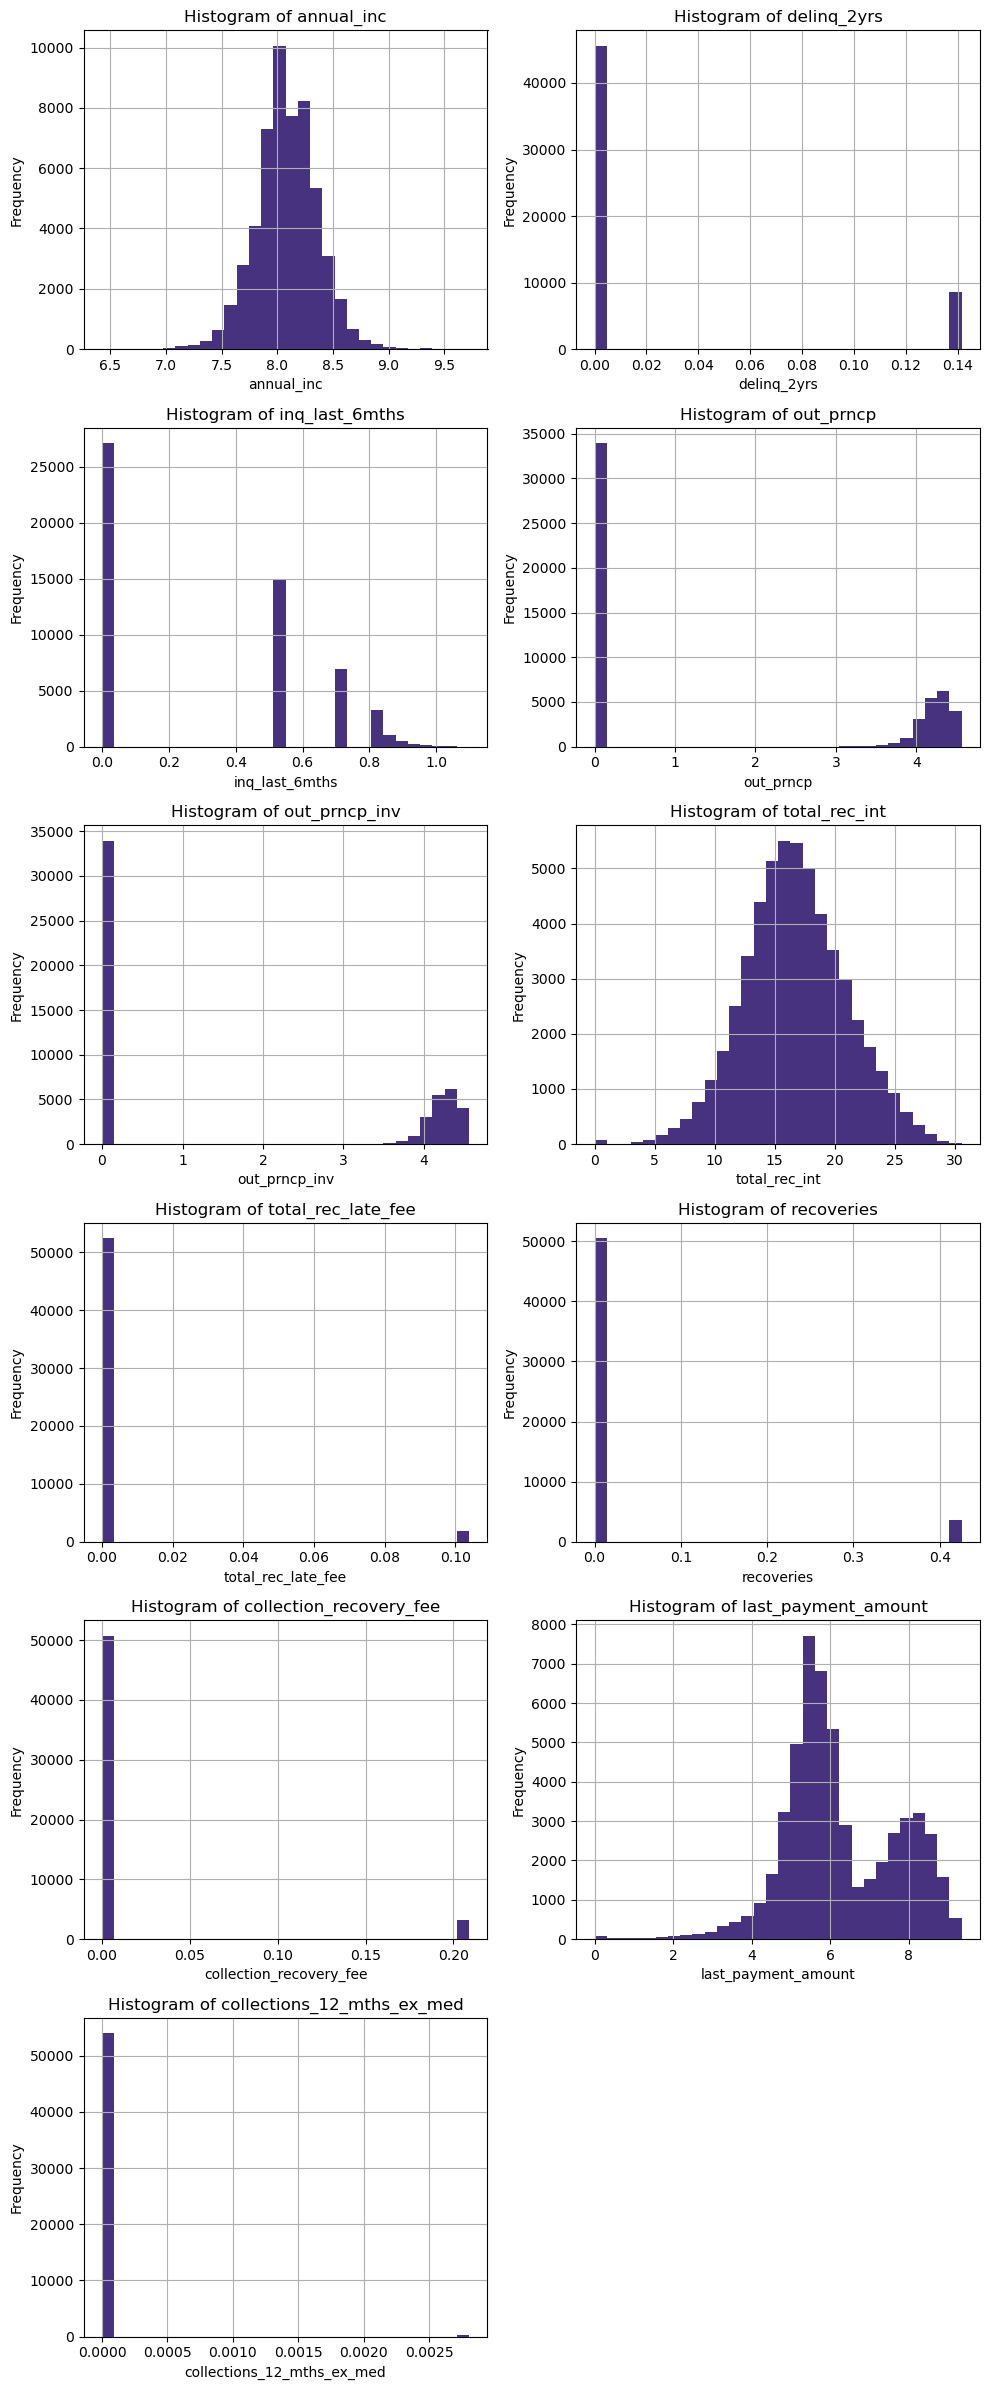

In [43]:
p_jy = transformations.Plotter(yj_transformed_data)
p_jy.plot_skewness()

# After transformation: 
- columns annual_inc, total_rec_amount, last_payment_amount look informative. The others don't. For example: - collections_12_months_ex_med is mostly 0s

In [44]:
df.collections_12_mths_ex_med.info()

<class 'pandas.core.series.Series'>
RangeIndex: 54231 entries, 0 to 54230
Series name: collections_12_mths_ex_med
Non-Null Count  Dtype  
--------------  -----  
54231 non-null  float64
dtypes: float64(1)
memory usage: 423.8 KB


In [45]:
yj_skewness_df = pd.DataFrame({'Column': high_skew_cols, 'Skewness': [yj_transformed_data[col].skew() for col in high_skew_cols] })

In [46]:

yj_skewness_df= yj_skewness_df.rename(columns={'Skewness':'YJ_skewness'})
yj_skewness_df

,Column,YJ_skewness
0,annual_inc,-0.011948
1,delinq_2yrs,1.869437
2,inq_last_6mths,0.250999
3,out_prncp,0.532879
4,out_prncp_inv,0.532896
5,total_rec_int,0.020837
6,total_rec_late_fee,5.279002
7,recoveries,3.446269
8,collection_recovery_fee,3.588306
9,last_payment_amount,-0.001766


In [47]:
skewness_df = pd.merge(skewness_df, yj_skewness_df, how='outer')

In [48]:
skewness_df

,Column,Skewness,YJ_skewness
0,loan_amount,0.805259,NaN
1,funded_amount,0.869922,NaN
2,funded_amount_inv,0.813927,NaN
3,term_months,1.148358,NaN
4,int_rate,0.456515,NaN
5,instalment,0.996981,NaN
6,employment_length_years,-0.038738,NaN
7,annual_inc,8.711831,-0.011948
8,dti,0.189420,NaN
9,delinq_2yrs,5.370002,1.869437


In [49]:
#Comparing the Yeo-Johnson transformed column's skewness, versus pre-transformation. After the transformation, some columns still have skewness above 1 in absolute value. Perhaps these columns are less informatiive, at least in the lens of statistical tests relying on the assumption of normality. 

In [50]:
high_skew_cols

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_payment_amount',
 'collections_12_mths_ex_med']

In [51]:
pd.DataFrame({col: stats.boxcox(df[col]+0.01) for col in high_skew_cols})

,annual_inc,delinq_2yrs,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med
0,"[7.932923247530658, 7.9768174194445765, 8.1796...","[0.46289293953100696, -272.73654570011786, -27...","[0.009948682478274391, -4.977053480936859, -4....","[5.352666790691874, 5.523265872701067, -6.1628...","[5.352489736184603, 5.523074820738859, -6.1629...","[12.933688678937708, 14.614407565920732, 14.80...","[-22209353.121138927, -22209353.121138927, -22...","[-384.94914626835833, -384.94914626835833, -38...","[-6165.250880199599, -6165.250880199599, -6165...","[5.994732981849812, 6.580244229402461, 10.9250...","[-2.0364092438707846e+109, -2.0364092438707846..."
1,-0.059533,-1.270482,-0.033301,-0.120935,-0.120944,0.210915,-3.972817,-1.359864,-2.050972,0.029716,-55.526683


In [52]:

high_skew_cols = ['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_payment_amount',
 'collections_12_mths_ex_med']  # Add other columns as needed

# Applying Box-Cox transformation and creating a new DataFrame
transformed_data = {}
for col in high_skew_cols:
    # Ensure positive data, adjust according to your dataset
    positive_data = df[col] + 0.01  
    # Apply Box-Cox transformation
    transformed_data[col], fitted_lambda = stats.boxcox(positive_data)

# Convert the dictionary of transformed data to DataFrame
bc_transformed_df = pd.DataFrame(transformed_data)


In [53]:
bc_transformed_df

,annual_inc,delinq_2yrs,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med
0,7.932923,0.462893,0.009949,5.352667,5.352490,12.933689,-2.220935e+07,-384.949146,-6165.25088,5.994733,-2.036409e+109
1,7.976817,-272.736546,-4.977053,5.523266,5.523075,14.614408,-2.220935e+07,-384.949146,-6165.25088,6.580244,-2.036409e+109
2,8.179699,-272.736546,-4.977053,-6.162805,-6.162948,14.800652,-2.220935e+07,-384.949146,-6165.25088,10.925027,-2.036409e+109
3,7.884784,-272.736546,-4.977053,-6.162805,-6.162948,15.381911,-2.220935e+07,-384.949146,-6165.25088,11.029145,-2.036409e+109
4,8.518567,-272.736546,0.009949,5.563908,5.563713,14.525518,-2.220935e+07,-384.949146,-6165.25088,6.716268,-2.036409e+109
...,...,...,...,...,...,...,...,...,...,...,...
54226,8.782739,0.462893,-4.977053,-6.162805,-6.162948,14.276521,-2.220935e+07,-384.949146,-6165.25088,5.482366,-2.036409e+109
54227,7.321379,-272.736546,1.081967,-6.162805,-6.162948,14.809492,2.517105e-01,-384.949146,-6165.25088,6.801225,-2.036409e+109
54228,8.869262,-272.736546,-4.977053,-6.162805,-6.162948,12.169479,-2.220935e+07,-384.949146,-6165.25088,5.050750,-2.036409e+109
54229,8.675558,-272.736546,-4.977053,-6.162805,-6.162948,9.337311,-2.220935e+07,-384.949146,-6165.25088,-4.303959,-2.036409e+109


In [54]:
bc_skewness = {col: bc_transformed_df[col].skew() for col in bc_transformed_df.columns}

/Users/antonfreidin/miniconda/envs/AICORE/lib/python3.11/site-packages/pandas/core/nanops.py:1252: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/Users/antonfreidin/miniconda/envs/AICORE/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/antonfreidin/miniconda/envs/AICORE/lib/python3.11/site-packages/pandas/core/nanops.py:1264: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


In [55]:
bc_skewness

{'annual_inc': -0.011944934698245015,
 'delinq_2yrs': 1.869386592263109,
 'inq_last_6mths': 0.054187666589915626,
 'out_prncp': 0.5264384138448827,
 'out_prncp_inv': 0.5264451449103248,
 'total_rec_int': 0.04606856453504074,
 'total_rec_late_fee': 5.275497678113272,
 'recoveries': 3.445889437028888,
 'collection_recovery_fee': 3.580447937183197,
 'last_payment_amount': 0.02027351421424802,
 'collections_12_mths_ex_med': nan}

In [56]:
bc_skewness= pd.DataFrame(list(bc_skewness.items()), columns=['Column', 'BC_skewness'])

In [57]:
bc_skewness

,Column,BC_skewness
0,annual_inc,-0.011945
1,delinq_2yrs,1.869387
2,inq_last_6mths,0.054188
3,out_prncp,0.526438
4,out_prncp_inv,0.526445
5,total_rec_int,0.046069
6,total_rec_late_fee,5.275498
7,recoveries,3.445889
8,collection_recovery_fee,3.580448
9,last_payment_amount,0.020274


In [58]:
skewness_df= pd.merge(skewness_df, bc_skewness, how='outer')

In [59]:
skewness_df

,Column,Skewness,YJ_skewness,BC_skewness
0,loan_amount,0.805259,NaN,NaN
1,funded_amount,0.869922,NaN,NaN
2,funded_amount_inv,0.813927,NaN,NaN
3,term_months,1.148358,NaN,NaN
4,int_rate,0.456515,NaN,NaN
5,instalment,0.996981,NaN,NaN
6,employment_length_years,-0.038738,NaN,NaN
7,annual_inc,8.711831,-0.011948,-0.011945
8,dti,0.189420,NaN,NaN
9,delinq_2yrs,5.370002,1.869437,1.869387


In [60]:
# Both transofrmaations are very similar in skeweness reduction


## Looking at outliers 

- first we code a box plot visualiser for numeric data (in transformations)
- the below plots the outliers of the cleaned dataframe's numeric columns

In [61]:
outliers = transformations.Plotter(df)

KeyboardInterrupt: 

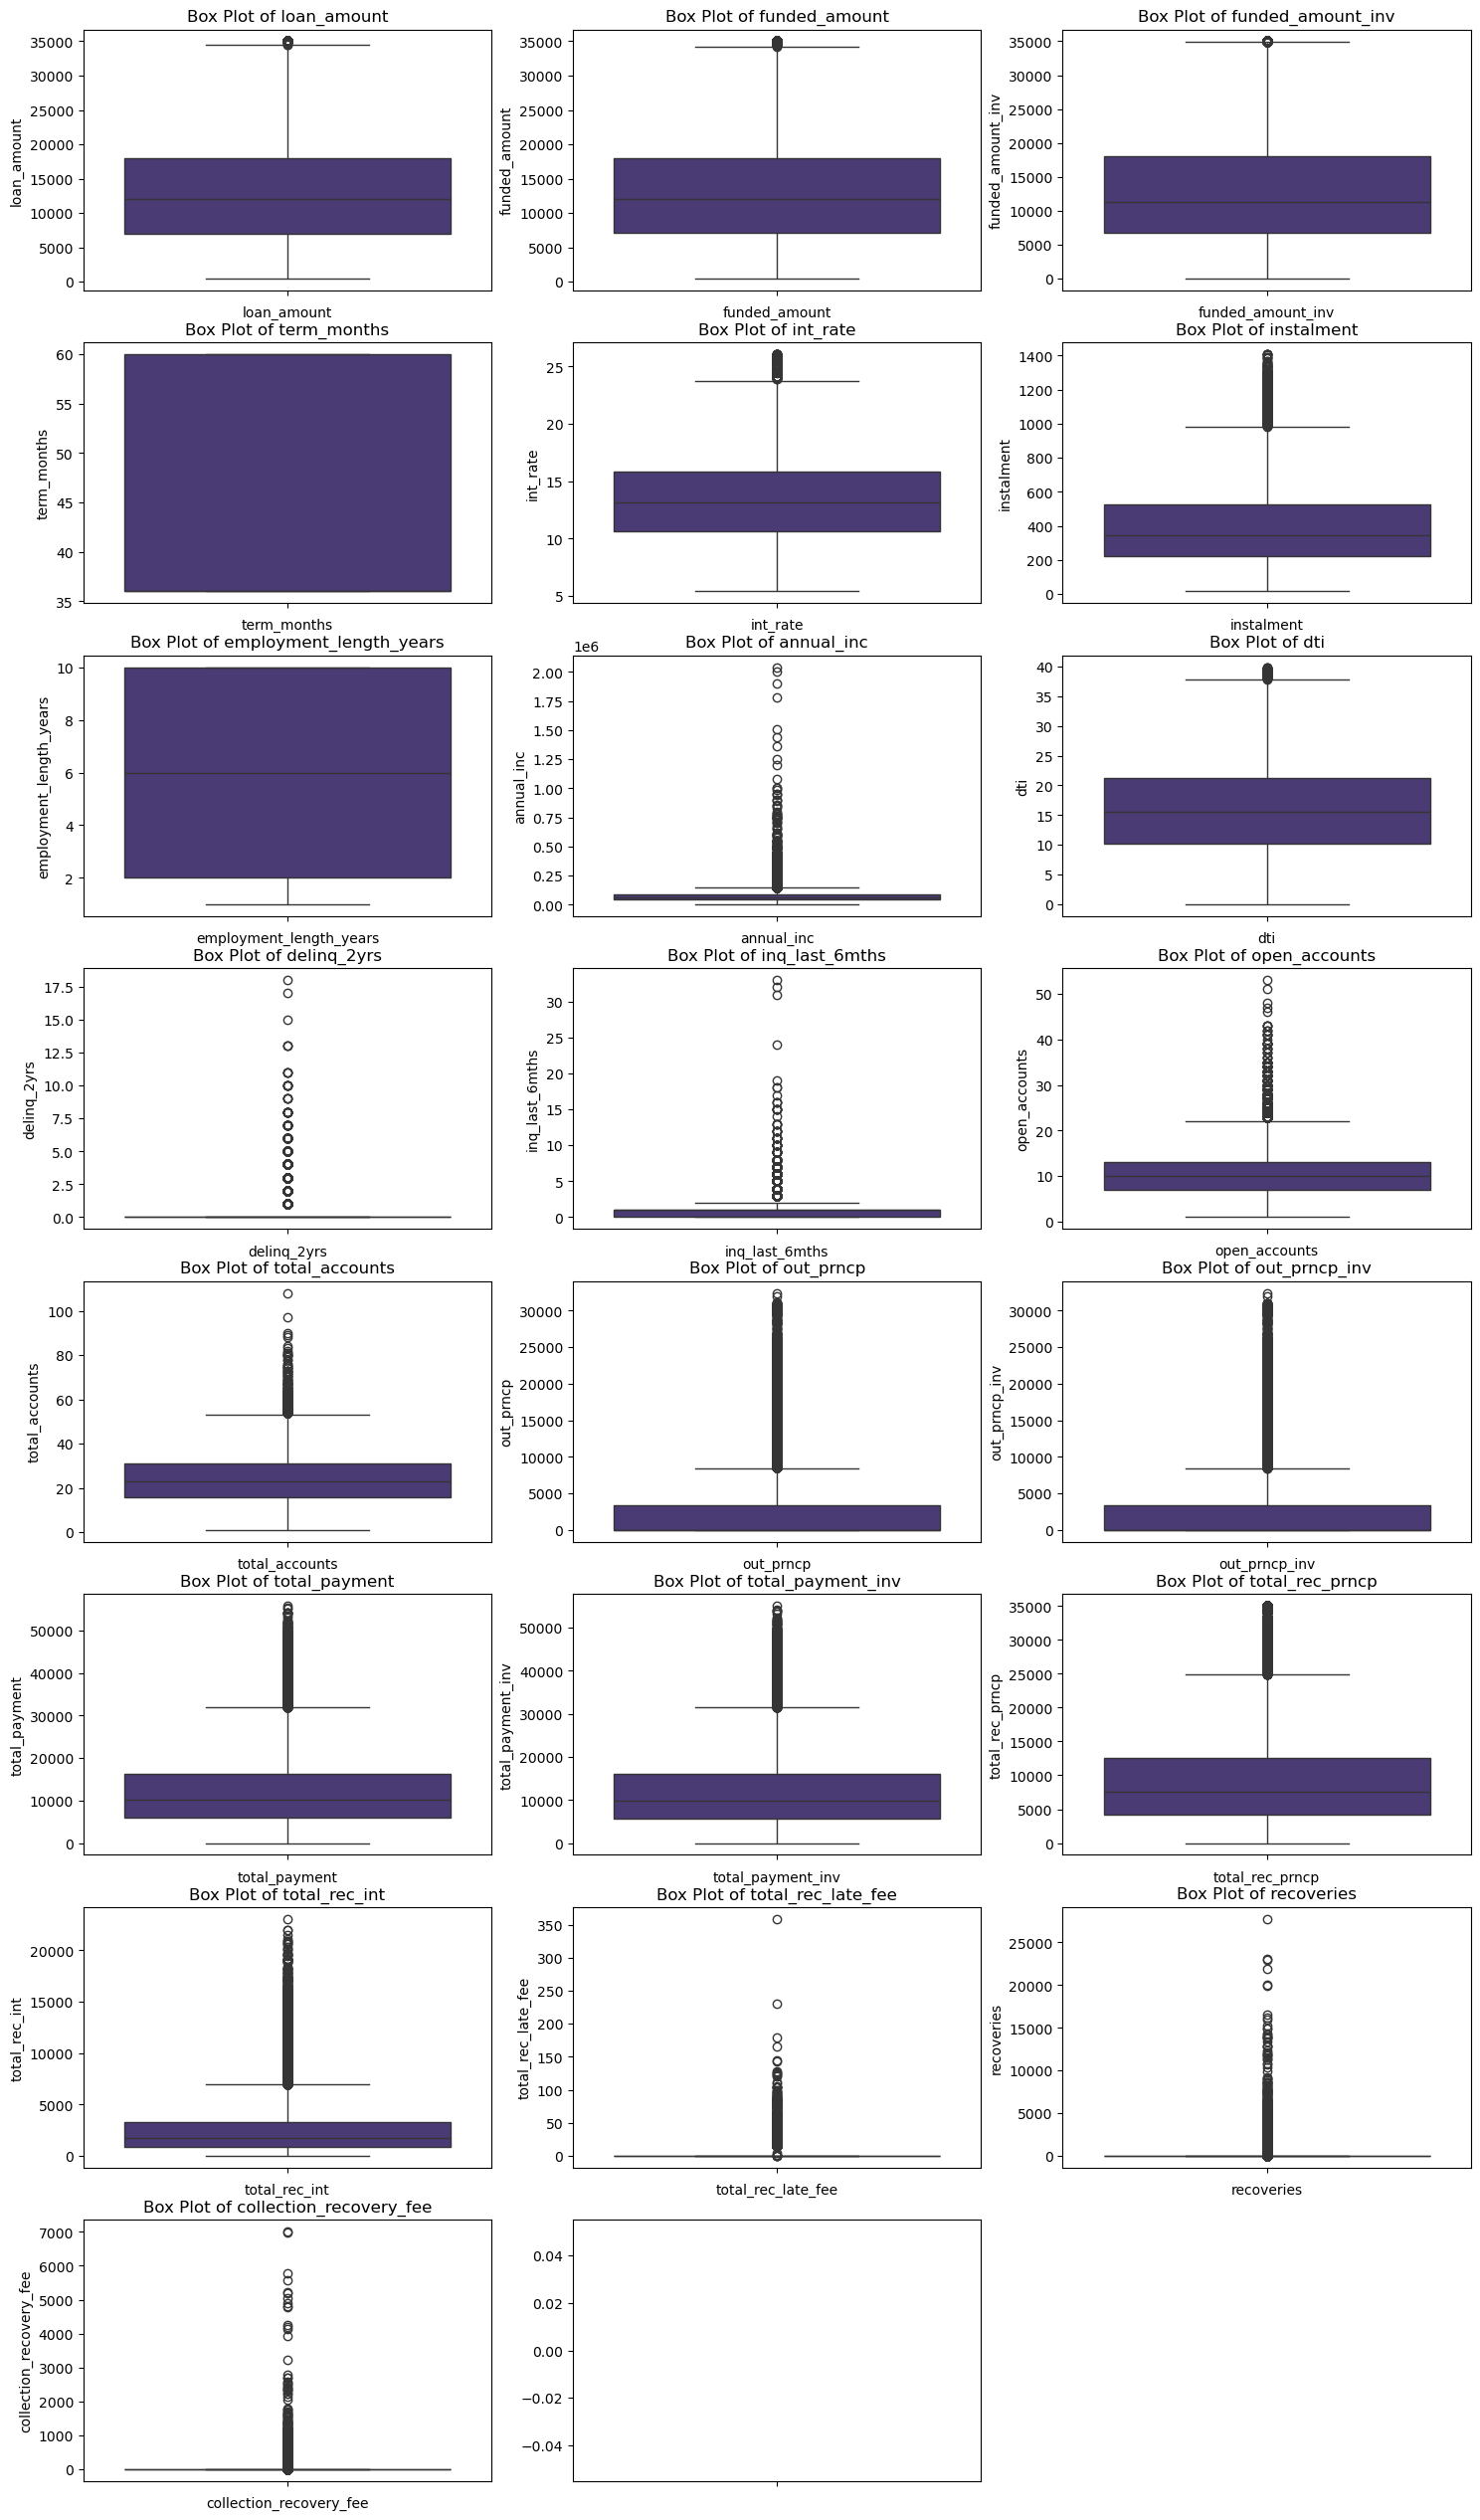

In [62]:
outliers.plot_outliers()

In [ ]:
 #  threshold for outlier (non negative data)

7000.0

In [ ]:
import transformations

In [63]:
transformations.Transforms.clean_outliers('loan_amount', df)

#That would drop rows based on an outlier/ leverage of a particular column.

# The condition would depend on the analysis required. Some columns closely follow the normal, so Z score could be used 

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_months,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,0.0,1,INDIVIDUAL
